# Classify Images of Clothing
Using the fashion MNIST dataset

### Import dataset

In [202]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist
# images = what is fed, labes = what is predicted
# train data is what the model learns from, test data is what the model tests against
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2.9.1


### Test & explore the data

In [203]:
print(train_images.shape,
      len(train_labels),
      train_labels,
      test_images.shape,
      len(test_labels),
      sep="\n")

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


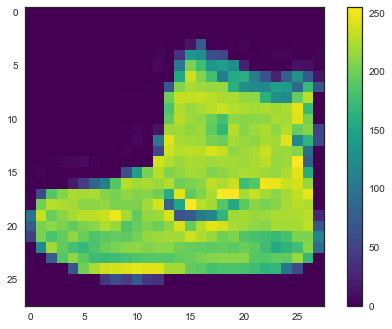

In [204]:
plt.figure()
plt.imshow(train_images[0], cmap='viridis')
plt.colorbar()
plt.grid(False)
plt.show()

### Preprocess the data
The RGB values representing pixels in the images are from 0 to 255. However, before before feeding them into the neural network, we need to make the values between 0 and 1. So, we can divide the RGB values 255. 

In general, `train_images` and others are arrays, so it doesn't make sense to be able to 'divide' an array. However, because these are numpy arrays, we are able to do this without any direct iteration.

In [205]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Taking a look at the training set:

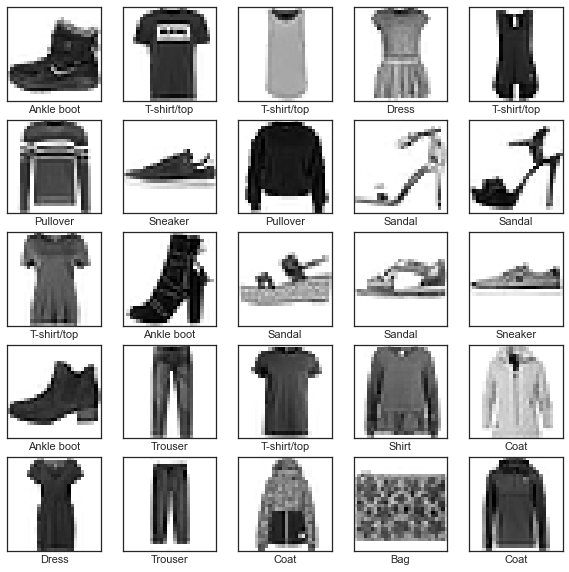

In [206]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the model
The model here consists of 3 layers. The first model flattens the images, which are 2D, $28\cdot28$ pixel arrays, into a 1D, $784$ pixel array. There is no learning done in this layer.

The 2nd and 3rd layer is where the learning occurs. They are `Dense` layers because all of the neurons are connected. Learning starts at the 2nd layer, and ends at the 3rd layer, where "scores" are returned indicating which of the 10 classes of items the image belonds to.

In [207]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
# note to self: https://www.tensorflow.org/tutorials/keras/classification
# continue reading from "Build the model" on 6/12/22 morning and follow along.

### Compiling the model
There are 3 parts:
1. **Loss function** - measures accuracy. We want to minimize this over time increasing epochs.
2. **Optimizer** - defines how the model is update based on data & loss function.
3. **Metrics** - data collected used to monitor training and testing steps.

In [208]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', tf.keras.metrics.MeanAbsoluteError()])

### Model training & evaluation

In [209]:
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4964 - accuracy: 0.8261 - mean_absolute_error: 6.8606
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3715 - accuracy: 0.8664 - mean_absolute_error: 8.2178
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3338 - accuracy: 0.8787 - mean_absolute_error: 9.0058
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8872 - mean_absolute_error: 9.6465
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2918 - accuracy: 0.8935 - mean_absolute_error: 10.2649
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2751 - accuracy: 0.8988 - mean_absolute_error: 10.6930
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2645 - accuracy: 0.9017 - mean_absolute_error: 11.3639
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - los

313/313 - 0s - loss: 0.3664 - accuracy: 0.8842 - mean_absolute_error: 17.0553 - 374ms/epoch - 1ms/step

Test accuracy: 0.8841999769210815


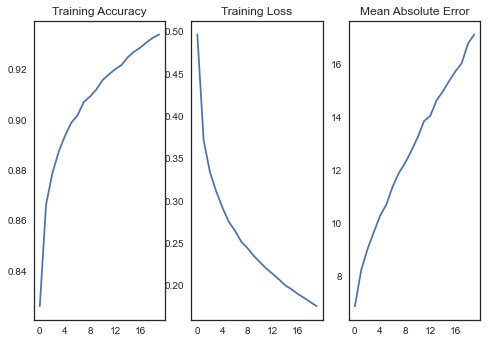

In [210]:
test_loss, test_acc, test_MAE = model.evaluate(test_images, test_labels, verbose= 2)
print('\nTest accuracy:', test_acc)

epochs_range = range(20)
acc = history.history['accuracy']
loss = history.history['loss']
MAE = history.history['mean_absolute_error']

def plot_metrics(x, y, label):
    plt.xticks(range(0, 20, 4))
    plt.plot(x, y, label=label)
    plt.title(label)

plt.figure()

plt.subplot(1, 3, 1)
plot_metrics(epochs_range, acc, 'Training Accuracy')

plt.subplot(1, 3, 2)
plot_metrics(epochs_range, loss, 'Training Loss')

plt.subplot(1, 3, 3)
plot_metrics(epochs_range, MAE, 'Mean Absolute Error')

plt.show()

### Predictions
We use the softmax function to convert logits into probabilities which are easier to interpret.

In [211]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

predictions[0] # returns confidence value of each label, highest value is predicted label
print(np.argmax(predictions[0])) # predicted label number
print(test_labels[0]) # actual label numer
print(class_names[test_labels[0]]) # label name

313/313 [==============================] - 0s 525us/step
9
9
Ankle boot


In [212]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap='binary')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def visualize_test(i):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions[i], test_labels)
    plt.show()

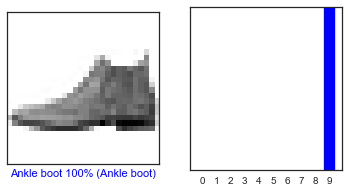

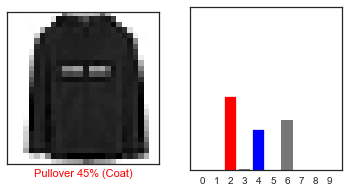

In [213]:
visualize_test(0)
visualize_test(98)